# TinyML ECG Classification

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

## Read Dataset

In [2]:
df_train = pd.read_csv("/kaggle/input/heartbeat/mitbih_train.csv", header=None)
df_test = pd.read_csv("/kaggle/input/heartbeat/mitbih_test.csv", header=None)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# df[187] is y (class 0~4)
print(df_train[187].value_counts())
print(df_test[187].value_counts())

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64


## Prepare Dataset

In [4]:
X_train = df_train.values[:, :-1]
y_train = df_train.values[:, -1].astype(int)

X_test  = df_test.values[:, :-1]
y_test  = df_test.values[:, -1].astype(int)

print(X_train.shape)
print(X_test.shape)

(87554, 187)
(21892, 187)


In [5]:
# reshape for Conv2D
x_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
x_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1, 1)

print(x_train.shape)
print(x_test.shape)

(87554, 187, 1, 1)
(21892, 187, 1, 1)


In [6]:
from tensorflow.keras import utils
y_train = utils.to_categorical(y_train)
y_test  = utils.to_categorical(y_test)

print(y_train.shape)
print(y_test.shape)

(87554, 5)
(21892, 5)


## Build Model

In [7]:
input_shape = x_train.shape[1:]
num_classes= 5

In [8]:
# Build Model 
from tensorflow.keras import models, layers

inputs = layers.Input(shape=input_shape)
x = layers.Conv2D(16, kernel_size=5, activation='relu', padding='same')(inputs)
#x = layers.Conv2D(16, kernel_size=5, activation='relu', padding='same')(x)
#x = layers.MaxPooling2D((2,2), padding='same')(x)

x = layers.Flatten()(x)
x = layers.Dense(16)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 187, 1, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 187, 1, 16)        416       
_________________________________________________________________
flatten (Flatten)            (None, 2992)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                47888     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 85        
Total params: 48,389
Trainable params: 48,389
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train Model

In [10]:
batch_size = 100
num_epochs = 10 

In [11]:
# Train Model
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(x_test, y_test))

Epoch 1/10
876/876 [==============================] - 9s 10ms/step - loss: 0.3526 - accuracy: 0.8985 - val_loss: 0.2330 - val_accuracy: 0.9356
Epoch 2/10
876/876 [==============================] - 7s 8ms/step - loss: 0.1913 - accuracy: 0.9476 - val_loss: 0.1785 - val_accuracy: 0.9537
Epoch 3/10
876/876 [==============================] - 7s 8ms/step - loss: 0.1613 - accuracy: 0.9562 - val_loss: 0.1664 - val_accuracy: 0.9545
Epoch 4/10
876/876 [==============================] - 7s 8ms/step - loss: 0.1490 - accuracy: 0.9593 - val_loss: 0.1592 - val_accuracy: 0.9556
Epoch 5/10
876/876 [==============================] - 8s 9ms/step - loss: 0.1415 - accuracy: 0.9611 - val_loss: 0.1458 - val_accuracy: 0.9607
Epoch 6/10
876/876 [==============================] - 7s 8ms/step - loss: 0.1351 - accuracy: 0.9626 - val_loss: 0.1413 - val_accuracy: 0.9620
Epoch 7/10
876/876 [==============================] - 7s 8ms/step - loss: 0.1305 - accuracy: 0.9645 - val_loss: 0.1408 - val_accuracy: 0.9643
Epoch

## Save Model

In [12]:
# Save Model
models.save_model(model, 'ecg_cnn.hdf5')

## TinyML

In [13]:
!pip install tinymlgen

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 52.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tinymlgen: filename=tinymlgen-0.2-py3-none-any.whl size=2242 sha256=58126d1e7b5380bf515faef89a87c81e43bfd0bac4ddc02454740f0b1b77686a
  Stored in directory: /root/.cache/pip/wheels/1c/94/c7/a18049eea10532c9975ad7353fcccc7c436673285b4723a4bb
  Created wheel for hexdump: filename=hexdump-3.3-py3-none-any.whl size=8913 sha256=00aa41d2e4406aa7e7676173b6e67c32870c2bf2e7b93444dc0f241aa633fae3
  Stored in directory: /root/.cache/pip/wheels/68/fe/aa/06fd9d6968cfc3e1926eeab1ec728c246dafa120a72ff9afae
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=77053 sha256=8b0ba610dad6e46d46c86d1ce87c454bdcc053dae596b9163f4eb63e40b82a30
  Stored in directory: /root/

### export model
    import tensorflow as tf
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()

    # Save the model to disk
    open("ecg_arrhythmia.tflite", "wb").write(tflite_model)
    
    # hex dump
    !xxd -i ecg_arrhythmia.tflite > ecg_arrhythmia.cc

In [14]:
from tinymlgen import port
c_code = port(model, variable_name='ecg_arrhythmia', pretty_print=True, optimize=False) 

with open('ecg_arrhythmia.h', 'w') as f:
    print(c_code, file=f)

## Export a test data

In [15]:
import random
idx = random.randint(0, len(X_test)-1)
print(idx)

16416


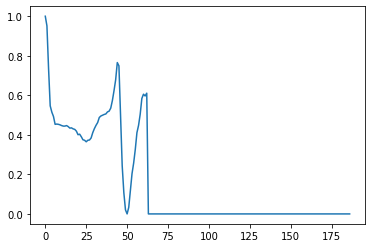

In [16]:
plt.plot(X_test[idx])

In [17]:
with open('x_test.h', 'w') as f:
    print("float x_test_dat[187] = {", file=f)    
    s="    "
    for i in range(187):
        s+=str(X_test[idx][i])+', '
        if i==186:
            print(s, file=f) 
        elif (i+1)%8==0:
            print(s, file=f)
            s="    "
    print("};", file=f)
f.close()

In [18]:
!cat x_test.h

float x_test_dat[187] = {
    1.0, 0.9513444304466248, 0.7349551916122435, 0.5467349290847777, 0.5147247314453125, 0.49295774102211, 0.4532650411128998, 0.4545454680919647, 
    0.4532650411128998, 0.45070421695709223, 0.44686299562454224, 0.44430217146873474, 0.44430217146873474, 0.44686299562454224, 0.4417413473129272, 0.4340589046478272, 
    0.4353393018245697, 0.43021768331527704, 0.4276568591594696, 0.41869398951530457, 0.4007682502269745, 0.403329074382782, 0.3905249536037445, 0.3751600384712219, 
    0.3725992441177368, 0.36491677165031433, 0.3725992441177368, 0.37387964129447937, 0.38412290811538696, 0.4110115170478821, 0.43149808049201965, 0.4481433928012848, 
    0.4622279107570648, 0.48783609271049494, 0.49551856517791754, 0.49935978651046753, 0.5032010078430176, 0.5057618618011475, 0.5160050988197327, 0.5198463797569275, 
    0.5352112650871277, 0.573623538017273, 0.6235595345497131, 0.6786171793937683, 0.7656850218772888, 0.7490397095680237, 0.49935978651046753, 0.2432778

In [19]:
print(y_test[idx])

[1. 0. 0. 0. 0.]
